# Winoground Statistics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/PhD/2022 Julen Etxaniz EHU/MAL/winoground/statistics

/content/drive/MyDrive/PhD/2022 Julen Etxaniz EHU/MAL/winoground/statistics


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 37.1 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Models

In [ ]:
import pandas as pd

def get_models_df(models):
    model_names = [model[1] for model in models]
    n_images = [model[2] for model in models]
    n_captions = [model[3] for model in models]
    architectures = [model[4] for model in models]
    attention = [model[5] for model in models]
    model_dict = {"Model": model_names, "Images": n_images, "Captions": n_captions, "Architecture": architectures, "Attention": attention}
    models_df = pd.DataFrame(model_dict)
    return models_df

### Baseline

In [61]:
path = "../results/baseline_scores/"

models_baseline = [
    (path + "human.jsonl", "MTurk Human", None, None, None, None),
    (path + "vinvl.jsonl", "VinVL", 1.89, 4.87, "single-stream", "merged"),
    (path + "uniter_large.jsonl", "UNITER$_{large}$", 4.197, 9.583, "single-stream", "merged"),
    (path + "uniter_base.jsonl", "UNITER$_{base}$", 4.197, 9.583, "single-stream", "merged"),
    (path + "villa_large.jsonl", "ViLLA$_{large}$", 4.197, 9.583, "single-stream", "merged"),
    (path + "villa_base.jsonl", "ViLLA$_{base}$", 4.197, 9.583, "single-stream", "merged"),
    (path + "visualbert.jsonl", "VisualBERT$_{base}$", 0.296, 0.517, "single-stream", "merged"),
    (path + "vilt.jsonl", "ViLT (ViT-B/32)", 4.098, 9.854, "single-stream", "merged"),
    (path + "lxmert.jsonl", "LXMERT", 0.18, 9.18, "dual-stream", "modality-specific, co-attn, merged"),
    (path + "vilbert.jsonl", "ViLBERT$_{base}$", 3.3, 3.3, "dual-stream", "modality-specific, co-attn, merged"),
    (path + "unit.jsonl", "UniT$_{ITM Finetuned}$", 0.688, 1.91, "dual-stream", "modality-specific, merged"),
    (path + "flava_itm.jsonl", "FLAVA$_{ITM}$", 70, 70, "dual-stream", "modality-specific, merged"),
    (path + "flava_zero_shot.jsonl", "FLAVA$_{Contrastive}$", 70, 70, "dual-stream", "modality-specific"),
    (path + "clip.jsonl", "CLIP (ViT-B/32)", 400, 400, "dual-stream", "modality-specific"),
    (path + "vse_coco_resnet_ft.jsonl", "VSE++$_{COCO}$ (ResNet)", 0.113, 0.565, "rnn", "-"),
    (path + "vse_coco_vgg_ft.jsonl", "VSE++$_{COCO}$ (VGG)", 0.113, 0.565, "rnn", "-"),
    (path + "vse_f30k_resnet_ft.jsonl", "VSE++$_{Flickr30k}$ (ResNet)", 0.031, 0.155, "rnn", "-"),
    (path + "vse_f30k_vgg_ft.jsonl", "VSE++$_{Flickr30k}$ (VGG)", 0.031, 0.155, "rnn", "-"),
    (path + "vsrn_coco.jsonl", "VSRN$_{COCO}$", 0.113, 0.565, "rnn", "-"),
    (path + "vsrn_flickr.jsonl", "VSRN$_{Flickr30k}$", 0.031, 0.155, "rnn", "-"),
]

models_baseline_no_human = [model for model in models_baseline if model[1] not in ("MTurk Human")]
models_baseline_no_outliers = [model for model in models_baseline if model[1] not in ("MTurk Human", "CLIP (ViT-B/32)", "FLAVA$_{ITM}$", "FLAVA$_{Contrastive}$")]

In [57]:
models_baseline_df = get_models_df(models_baseline_no_human)
models_baseline_df.round(2)

,Model,Images,Captions,Architecture,Attention
0,VinVL,1.89,4.87,single-stream,merged
1,UNITER$_{large}$,4.20,9.58,single-stream,merged
2,UNITER$_{base}$,4.20,9.58,single-stream,merged
3,ViLLA$_{large}$,4.20,9.58,single-stream,merged
4,ViLLA$_{base}$,4.20,9.58,single-stream,merged
5,VisualBERT$_{base}$,0.30,0.52,single-stream,merged
6,ViLT (ViT-B/32),4.10,9.85,single-stream,merged
7,LXMERT,0.18,9.18,dual-stream,"modality-specific, co-attn, merged"
8,ViLBERT$_{base}$,3.30,3.30,dual-stream,"modality-specific, co-attn, merged"
9,UniT$_{ITM Finetuned}$,0.69,1.91,dual-stream,"modality-specific, merged"


### New

In [12]:
path = "../results/scores/"
models = [
    (path + "human.jsonl", "MTurk Human", None, None, None, None),
    (path + "vilt.jsonl", "ViLT (ViT-B/32)", 4.098, 9.854, "single-stream", "merged"),
    (path + "vilt_coco.jsonl", "ViLT$_{COCO}$ (ViT-B/32)", 4.098, 9.854, "single-stream", "merged"),
    (path + "vilt_flickr30k.jsonl", "ViLT$_{Flickr30k}$ (ViT-B/32)", 4.098, 9.854, "single-stream", "merged"),
    (path + "flava_itm.jsonl", "FLAVA$_{ITM}$", 70, 70, "dual-stream", "modality-specific, merged"),
    (path + "flava_itc.jsonl", "FLAVA$_{ITC}$", 70, 70, "dual-stream", "modality-specific"),
    (path + "clip_b32.jsonl", "CLIP (ViT-B/32)", 400, 400, "dual-stream", "modality-specific"),
    (path + "clip_b16.jsonl", "CLIP (ViT-B/16)", 400, 400, "dual-stream", "modality-specific"),
    (path + "clip_l14.jsonl", "CLIP (ViT-L/14)", 400, 400, "dual-stream", "modality-specific"),
    (path + "clip_l14-336.jsonl", "CLIP (ViT-L/14-336)", 400, 400, "dual-stream", "modality-specific"),
    (path + "blip_itm_b16_14m.jsonl", "BLIP$_{ITM 14M}$ (ViT-B/16)", 14, 15, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_b16_14m.jsonl", "BLIP$_{ITC 14M}$ (ViT-B/16)", 14, 15, "dual-stream", "modality-specific"),
    (path + "blip_itm_b16.jsonl", "BLIP$_{ITM}$ (ViT-B/16)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_b16.jsonl", "BLIP$_{ITC}$ (ViT-B/16)", 129, 130, "dual-stream", "modality-specific"),
    (path + "blip_itm_b16_capfilt.jsonl", "BLIP$_{ITM}$ (ViT-B/16) (CapFilt-L)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_b16_capfilt.jsonl", "BLIP$_{ITC}$ (ViT-B/16) (CapFilt-L)", 129, 130, "dual-stream", "modality-specific"),
    (path + "blip_itm_l16.jsonl", "BLIP$_{ITM}$ (ViT-L/16)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_l16.jsonl", "BLIP$_{ITC}$ (ViT-L/16)", 129, 130, "dual-stream", "modality-specific"),
    (path + "blip_itm_b16_coco.jsonl", "BLIP$_{ITM COCO}$ (ViT-B/16)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_b16_coco.jsonl", "BLIP$_{ITC COCO}$ (ViT-B/16)", 129, 130, "dual-stream", "modality-specific"),
    (path + "blip_itm_b16_flickr30k.jsonl", "BLIP$_{ITM Flickr30k}$ (ViT-B/16)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_b16_flickr30k.jsonl", "BLIP$_{ITC Flickr30k}$ (ViT-B/16)", 129, 130, "dual-stream", "modality-specific"),
    (path + "blip_itm_l16_coco.jsonl", "BLIP$_{ITM COCO}$ (ViT-L/16)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_l16_coco.jsonl", "BLIP$_{ITC COCO}$ (ViT-L/16)", 129, 130, "dual-stream", "modality-specific"),
    (path + "blip_itm_l16_flickr30k.jsonl", "BLIP$_{ITM Flickr30k}$ (ViT-L/16)", 129, 130, "dual-stream", "modality-specific, merged"),
    (path + "blip_itc_l16_flickr30k.jsonl", "BLIP$_{ITC Flickr30k}$ (ViT-L/16)", 129, 130, "dual-stream", "modality-specific"),
]

models_no_human = [model for model in models if model[1] not in ("MTurk Human")]
models_without_data_size_outliers = [model for model in models if model[1] not in ("MTurk Human")]

In [11]:
model_datasets = [
                  ("ViLT", "COCO, VG, SBU, CC"),
                  ("FLAVA", "COCO, SBU, LN, CC, VG, WIT, CC 12M, RC, YFCC100M"),
                  ("CLIP", "-"),
                  ("BLIP 14M", "COCO VG SBU CC3M CC12M"),
                  ("BLIP 129M", "COCO VG SBU CC3M CC12M LAION")
]

In [58]:
models_df = get_models_df(models_no_human)
models_df.round(2)

,Model,Images,Captions,Architecture,Attention
0,ViLT (ViT-B/32),4.1,9.85,single-stream,merged
1,ViLT$_{COCO}$ (ViT-B/32),4.1,9.85,single-stream,merged
2,ViLT$_{Flickr30k}$ (ViT-B/32),4.1,9.85,single-stream,merged
3,FLAVA$_{ITM}$,70.0,70.00,dual-stream,"modality-specific, merged"
4,FLAVA$_{ITC}$,70.0,70.00,dual-stream,modality-specific
5,CLIP (ViT-B/32),400.0,400.00,dual-stream,modality-specific
6,CLIP (ViT-B/16),400.0,400.00,dual-stream,modality-specific
7,CLIP (ViT-L/14),400.0,400.00,dual-stream,modality-specific
8,CLIP (ViT-L/14-336),400.0,400.00,dual-stream,modality-specific
9,BLIP$_{ITM 14M}$ (ViT-B/16),14.0,15.00,dual-stream,"modality-specific, merged"


## Results

In [79]:
import json
import statistics
from tabulate import tabulate
import numpy as np
import random
import scipy.stats
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, VPacker
from matplotlib.lines import Line2D
random.seed(0)

def text_correct(result):
    return result["c0_i0"] > result["c1_i0"] and result["c1_i1"] > result["c0_i1"]

def image_correct(result):
    return result["c0_i0"] > result["c0_i1"] and result["c1_i1"] > result["c1_i0"]

def group_correct(result):
    return image_correct(result) and text_correct(result)

def text_accuracy(result):
    correct = 0
    correct += 1 if result["c0_i0"] > result["c1_i0"] else 0
    correct += 1 if result["c1_i1"] > result["c0_i1"] else 0
    return correct / 2

def image_accuracy(result):
    correct = 0
    correct += 1 if result["c0_i0"] > result["c0_i1"] else 0
    correct += 1 if result["c1_i1"] > result["c1_i0"] else 0
    return correct / 2

def group_accuracy(result):
    return (text_accuracy(result) + image_accuracy(result)) / 2

def load_results(filename):
    results = {}
    for line in open(filename, "r").readlines():
        score_dict = json.loads(line)
        id, c, i = score_dict["label"].split("_")
        id = int(id)
        scores = results.get(id, {})
        scores["_".join([c,i])] = score_dict["score"]
        results[id] = scores
    return results

def confidence_intervals(text_results, image_results, group_results):
    text_bootstrap_result = scipy.stats.bootstrap(data=(text_results,), statistic=scipy.mean)
    image_bootstrap_result = scipy.stats.bootstrap(data=(image_results,), statistic=scipy.mean)
    group_bootstrap_result = scipy.stats.bootstrap(data=(group_results,), statistic=scipy.mean)
    text_score = "{:0.2f}".format(100*statistics.mean(text_results))\
        + " & [" + "{:0.2f}".format(100*text_bootstrap_result.confidence_interval.low)\
        + "," + "{:0.2f}".format(100*text_bootstrap_result.confidence_interval.high) + "]"
    image_score = "{:0.2f}".format(100*statistics.mean(image_results))\
        + " & [" + "{:0.2f}".format(100*image_bootstrap_result.confidence_interval.low)\
        + "," + "{:0.2f}".format(100*image_bootstrap_result.confidence_interval.high) + "]"
    group_score = "{:0.2f}".format(100*statistics.mean(group_results))\
        + " & [" + "{:0.2f}".format(100*group_bootstrap_result.confidence_interval.low)\
        + "," + "{:0.2f}".format(100*group_bootstrap_result.confidence_interval.high) + "]"
    return text_score, image_score, group_score

def get_table_dict(models, filtered_ids=None, bootstrap_confidence_intervals=False):
    table_dict = {"Model": ["Random Chance"], "Text": [25.00], "Image": [25.00], "Group": [16.67], 
                  "Text Acc": [50.00], "Image Acc": [50.00], "Group Acc": [50.00]}

    for filename, display_name, _, _, _, _ in models:
        results = load_results(filename)
        if filtered_ids is not None:
            filtered_results = {}
            for key, value in results.items():
                if key in filtered_ids:
                    filtered_results[key] = value
            results = filtered_results

        text_results = [text_correct(result) for result in results.values()]
        image_results = [image_correct(result) for result in results.values()]
        group_results = [group_correct(result) for result in results.values()]
        text_accuracies = [text_accuracy(result) for result in results.values()]
        image_accuracies = [image_accuracy(result) for result in results.values()]
        group_accuracies = [group_accuracy(result) for result in results.values()]

        if bootstrap_confidence_intervals:
            text_score, image_score, group_score = confidence_intervals(text_results, image_results, group_results)
            text_acc, image_acc, group_acc = confidence_intervals(text_accuracies, image_accuracies, group_accuracies)
        else:
            text_score = 100*statistics.mean(text_results)
            image_score = 100*statistics.mean(image_results)
            group_score = 100*statistics.mean(group_results)
            text_acc = 100*statistics.mean(text_accuracies)
            image_acc = 100*statistics.mean(image_accuracies)
            group_acc = 100*statistics.mean(group_accuracies)
            
        table_dict["Model"].append(display_name)
        table_dict["Text"].append(text_score)
        table_dict["Image"].append(image_score)
        table_dict["Group"].append(group_score)
        table_dict["Text Acc"].append(text_acc)
        table_dict["Image Acc"].append(image_acc)
        table_dict["Group Acc"].append(group_acc)

    return table_dict

def bolden_table_dict(table_dict):
    new_table_dict = table_dict.copy()
    new_text = []
    for item in table_dict["Text"]:
        if item > 25:
            new_text.append("\\textbf{" + f'{item:.2f}' + "}")
        else:
            new_text.append(f'{item:.2f}')
    new_table_dict["Text"] = new_text

    new_image = []
    for item in table_dict["Image"]:
        if item > 25:
            new_image.append("\\textbf{" + f'{item:.2f}' + "}")
        else:
            new_image.append(f'{item:.2f}')
    new_table_dict["Image"] = new_image

    new_group = []
    for item in table_dict["Group"]:
        if item > 16.67:
            new_group.append("\\textbf{" + f'{item:.2f}' + "}")
        else:
            new_group.append(f'{item:.2f}')
    new_table_dict["Group"] = new_group

    new_text = []
    for item in table_dict["Text Acc"]:
        if item > 50:
            new_text.append("\\textbf{" + f'{item:.2f}' + "}")
        else:
            new_text.append(f'{item:.2f}')
    new_table_dict["Text Acc"] = new_text

    new_image = []
    for item in table_dict["Image Acc"]:
        if item > 50:
            new_image.append("\\textbf{" + f'{item:.2f}' + "}")
        else:
            new_image.append(f'{item:.2f}')
    new_table_dict["Image Acc"] = new_image

    new_group = []
    for item in table_dict["Group Acc"]:
        if item > 50:
            new_group.append("\\textbf{" + f'{item:.2f}' + "}")
        else:
            new_group.append(f'{item:.2f}')
    new_table_dict["Group Acc"] = new_group

    return new_table_dict

In [70]:
def bold_gt_25(val):
    bold = 'bold' if val > 25 else ''
    return 'font-weight: %s' % bold

def bold_gt_16(val):
    bold = 'bold' if val > 16.67 else ''
    return 'font-weight: %s' % bold

def bold_gt_50(val):
    bold = 'bold' if val > 50 else ''
    return 'font-weight: %s' % bold

### Baseline

In [101]:
baseline_table_dict = get_table_dict(models_baseline)
print(tabulate(bolden_table_dict(baseline_table_dict), headers=baseline_table_dict.keys(), tablefmt="latex_raw", floatfmt=".2f"))

\begin{tabular}{lllllll}
\hline
 Model                        & Text           & Image          & Group          & Text Acc       & Image Acc      & Group Acc      \\
\hline
 Random Chance                & 25.00          & 25.00          & 16.67          & 50.00          & 50.00          & 50.00          \\
 MTurk Human                  & \textbf{89.50} & \textbf{88.50} & \textbf{85.50} & \textbf{93.75} & \textbf{93.88} & \textbf{93.81} \\
 VinVL                        & \textbf{37.75} & 17.75          & 14.50          & \textbf{62.75} & \textbf{57.75} & \textbf{60.25} \\
 UNITER$_{large}$             & \textbf{38.00} & 14.00          & 10.50          & \textbf{63.25} & \textbf{55.75} & \textbf{59.50} \\
 UNITER$_{base}$              & \textbf{32.25} & 13.25          & 10.00          & \textbf{60.62} & \textbf{55.50} & \textbf{58.06} \\
 ViLLA$_{large}$              & \textbf{37.00} & 13.25          & 11.00          & \textbf{62.62} & \textbf{55.25} & \textbf{58.94} \\
 ViLLA$_{base}$ 

In [75]:
df_baseline = pd.DataFrame(baseline_table_dict)
df_baseline.round(2)

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc
0,Random Chance,25.00,25.00,16.67,50.00,50.00,50.00
1,MTurk Human,89.50,88.50,85.50,93.75,93.88,93.81
2,VinVL,37.75,17.75,14.50,62.75,57.75,60.25
3,UNITER$_{large}$,38.00,14.00,10.50,63.25,55.75,59.50
4,UNITER$_{base}$,32.25,13.25,10.00,60.62,55.50,58.06
5,ViLLA$_{large}$,37.00,13.25,11.00,62.62,55.25,58.94
6,ViLLA$_{base}$,30.00,12.00,8.00,59.62,55.00,57.31
7,VisualBERT$_{base}$,15.50,2.50,1.50,50.50,49.88,50.19
8,ViLT (ViT-B/32),34.75,14.00,9.25,60.50,55.38,57.94
9,LXMERT,19.25,7.00,4.00,52.12,51.88,52.00


In [76]:
df_baseline.style.applymap(bold_gt_25, subset=pd.IndexSlice[:, ['Text', 'Image']]).\
    applymap(bold_gt_16, subset=pd.IndexSlice[:, ['Group']]).\
    applymap(bold_gt_50, subset=pd.IndexSlice[:, ['Text Acc', 'Image Acc', 'Group Acc']])

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc
0,Random Chance,25.000000,25.000000,16.670000,50.000000,50.000000,50.000000
1,MTurk Human,89.500000,88.500000,85.500000,93.750000,93.875000,93.812500
2,VinVL,37.750000,17.750000,14.500000,62.750000,57.750000,60.250000
3,UNITER$_{large}$,38.000000,14.000000,10.500000,63.250000,55.750000,59.500000
4,UNITER$_{base}$,32.250000,13.250000,10.000000,60.625000,55.500000,58.062500
5,ViLLA$_{large}$,37.000000,13.250000,11.000000,62.625000,55.250000,58.937500
6,ViLLA$_{base}$,30.000000,12.000000,8.000000,59.625000,55.000000,57.312500
7,VisualBERT$_{base}$,15.500000,2.500000,1.500000,50.500000,49.875000,50.187500
8,ViLT (ViT-B/32),34.750000,14.000000,9.250000,60.500000,55.375000,57.937500
9,LXMERT,19.250000,7.000000,4.000000,52.125000,51.875000,52.000000


### New

In [40]:
results_table_dict = get_table_dict(models)
print(tabulate(bolden_table_dict(results_table_dict), headers=results_table_dict.keys(), tablefmt="latex_raw", floatfmt=".2f"))

Aggregate without confidence intervals:
\begin{tabular}{lllllll}
\hline
 Model                               & Text           & Image          & Group          & Text Acc       & Image Acc      & Group Acc      \\
\hline
 Random Chance                       & 25.00          & 25.00          & 16.67          & 50.00          & 50.00          & 50.00          \\
 MTurk Human                         & \textbf{89.50} & \textbf{88.50} & \textbf{85.50} & \textbf{93.75} & \textbf{93.88} & \textbf{93.81} \\
 ViLT (ViT-B/32)                     & \textbf{27.50} & 8.75           & 6.00           & \textbf{56.88} & \textbf{53.12} & \textbf{55.00} \\
 ViLT$_{COCO}$ (ViT-B/32)            & \textbf{32.75} & 13.50          & 11.25          & \textbf{61.88} & \textbf{56.00} & \textbf{58.94} \\
 ViLT$_{Flickr30k}$ (ViT-B/32)       & \textbf{35.00} & 11.50          & 9.75           & \textbf{61.62} & \textbf{54.50} & \textbf{58.06} \\
 FLAVA$_{ITM}$                       & 21.75          & 10.25        

In [72]:
df_results = pd.DataFrame(results_table_dict)
df_results.round(2)

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc
0,Random Chance,25.00,25.00,16.67,50.00,50.00,50.00
1,MTurk Human,89.50,88.50,85.50,93.75,93.88,93.81
2,ViLT (ViT-B/32),27.50,8.75,6.00,56.88,53.12,55.00
3,ViLT$_{COCO}$ (ViT-B/32),32.75,13.50,11.25,61.88,56.00,58.94
4,ViLT$_{Flickr30k}$ (ViT-B/32),35.00,11.50,9.75,61.62,54.50,58.06
5,FLAVA$_{ITM}$,21.75,10.25,4.75,57.75,53.12,55.44
6,FLAVA$_{ITC}$,25.25,13.50,9.00,59.25,55.12,57.19
7,CLIP (ViT-B/32),30.75,10.25,8.25,60.38,53.12,56.75
8,CLIP (ViT-B/16),25.00,10.25,7.00,57.88,53.75,55.81
9,CLIP (ViT-L/14),28.50,11.00,8.00,60.38,54.62,57.50


In [73]:
df_results.style.applymap(bold_gt_25, subset=pd.IndexSlice[:, ['Text', 'Image']]).\
    applymap(bold_gt_16, subset=pd.IndexSlice[:, ['Group']]).\
    applymap(bold_gt_50, subset=pd.IndexSlice[:, ['Text Acc', 'Image Acc', 'Group Acc']])

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc
0,Random Chance,25.000000,25.000000,16.670000,50.000000,50.000000,50.000000
1,MTurk Human,89.500000,88.500000,85.500000,93.750000,93.875000,93.812500
2,ViLT (ViT-B/32),27.500000,8.750000,6.000000,56.875000,53.125000,55.000000
3,ViLT$_{COCO}$ (ViT-B/32),32.750000,13.500000,11.250000,61.875000,56.000000,58.937500
4,ViLT$_{Flickr30k}$ (ViT-B/32),35.000000,11.500000,9.750000,61.625000,54.500000,58.062500
5,FLAVA$_{ITM}$,21.750000,10.250000,4.750000,57.750000,53.125000,55.437500
6,FLAVA$_{ITC}$,25.250000,13.500000,9.000000,59.250000,55.125000,57.187500
7,CLIP (ViT-B/32),30.750000,10.250000,8.250000,60.375000,53.125000,56.750000
8,CLIP (ViT-B/16),25.000000,10.250000,7.000000,57.875000,53.750000,55.812500
9,CLIP (ViT-L/14),28.500000,11.000000,8.000000,60.375000,54.625000,57.500000


## Confidence Intervals

### Baseline

In [102]:
# Note that the confidence interval code has been updated to use non-parametric bootstrapping. In the paper,
# a t-distribution was assumed. Even though the new code assumes less, the bounds tend to be tighter.
baseline_confidence_table_dict = get_table_dict(models_baseline, bootstrap_confidence_intervals=True)
print(tabulate(baseline_confidence_table_dict, headers=baseline_confidence_table_dict.keys(), tablefmt="latex_booktabs", floatfmt=".2f"))

\begin{tabular}{lllllll}
\toprule
 Model                        & Text                  & Image                 & Group                 & Text Acc              & Image Acc             & Group Acc             \\
\midrule
 Random Chance                & 25.0                  & 25.0                  & 16.67                 & 50.0                  & 50.0                  & 50.0                  \\
 MTurk Human                  & 89.50 \& [85.99,92.00] & 88.50 \& [84.75,91.00] & 85.50 \& [81.50,88.50] & 93.75 \& [91.38,95.25] & 93.88 \& [91.88,95.38] & 93.81 \& [91.88,95.25] \\
 VinVL                        & 37.75 \& [32.75,42.25] & 17.75 \& [14.00,21.50] & 14.50 \& [11.25,18.00] & 62.75 \& [59.38,65.88] & 57.75 \& [55.62,59.75] & 60.25 \& [58.00,62.50] \\
 UNITER\$\_\{large\}\$             & 38.00 \& [33.00,42.50] & 14.00 \& [10.75,17.50] & 10.50 \& [7.50,13.50]  & 63.25 \& [60.00,66.25] & 55.75 \& [53.87,57.63] & 59.50 \& [57.19,61.50] \\
 UNITER\$\_\{base\}\$              & 32.25 \& [27

In [84]:
pd.DataFrame(baseline_confidence_table_dict)

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc
0,Random Chance,25.0,25.0,16.67,50.0,50.0,50.0
1,MTurk Human,"89.50 & [86.00,92.00]","88.50 & [85.00,91.25]","85.50 & [81.25,88.50]","93.75 & [91.50,95.38]","93.88 & [91.75,95.38]","93.81 & [91.81,95.25]"
2,VinVL,"37.75 & [33.00,42.50]","17.75 & [14.00,21.50]","14.50 & [11.00,18.00]","62.75 & [59.38,65.75]","57.75 & [55.62,59.75]","60.25 & [57.97,62.44]"
3,UNITER$_{large}$,"38.00 & [33.00,42.50]","14.00 & [10.75,17.50]","10.50 & [7.50,13.50]","63.25 & [59.88,66.25]","55.75 & [53.75,57.50]","59.50 & [57.31,61.56]"
4,UNITER$_{base}$,"32.25 & [27.75,36.75]","13.25 & [10.00,16.50]","10.00 & [7.25,13.00]","60.62 & [57.50,63.62]","55.50 & [53.62,57.25]","58.06 & [56.00,60.12]"
5,ViLLA$_{large}$,"37.00 & [32.25,41.50]","13.25 & [10.00,16.50]","11.00 & [8.00,14.00]","62.62 & [59.25,65.75]","55.25 & [53.37,57.12]","58.94 & [56.75,61.00]"
6,ViLLA$_{base}$,"30.00 & [25.50,34.50]","12.00 & [8.75,15.25]","8.00 & [5.50,10.75]","59.62 & [56.62,62.62]","55.00 & [53.12,56.75]","57.31 & [55.31,59.19]"
7,VisualBERT$_{base}$,"15.50 & [12.00,19.25]","2.50 & [1.00,4.00]","1.50 & [0.50,2.75]","50.50 & [47.75,53.00]","49.88 & [48.60,50.88]","50.19 & [48.62,51.62]"
8,ViLT (ViT-B/32),"34.75 & [29.75,39.25]","14.00 & [10.69,17.50]","9.25 & [6.50,12.00]","60.50 & [57.12,63.62]","55.38 & [53.37,57.25]","57.94 & [55.62,60.00]"
9,LXMERT,"19.25 & [15.25,23.00]","7.00 & [4.50,9.50]","4.00 & [2.25,6.00]","52.12 & [49.25,55.00]","51.88 & [50.25,53.37]","52.00 & [50.19,53.75]"


### New

In [80]:
# Note that the confidence interval code has been updated to use non-parametric bootstrapping. In the paper,
# a t-distribution was assumed. Even though the new code assumes less, the bounds tend to be tighter.
confidence_table_dict = get_table_dict(models, bootstrap_confidence_intervals=True)
print(tabulate(confidence_table_dict, headers=confidence_table_dict.keys(), tablefmt="latex_raw", floatfmt=".2f"))

Aggregate with confidence intervals:
\begin{tabular}{lllllll}
\hline
 Model                               & Text                  & Image                 & Group                 & Text Acc              & Image Acc             & Group Acc             \\
\hline
 Random Chance                       & 25.0                  & 25.0                  & 16.67                 & 50.0                  & 50.0                  & 50.0                  \\
 MTurk Human                         & 89.50 & [86.00,92.00] & 88.50 & [84.75,91.25] & 85.50 & [81.50,88.50] & 93.75 & [91.50,95.38] & 93.88 & [91.88,95.25] & 93.81 & [91.88,95.25] \\
 ViLT (ViT-B/32)                     & 27.50 & [23.00,31.75] & 8.75 & [6.00,11.50]   & 6.00 & [3.75,8.25]    & 56.88 & [53.75,59.88] & 53.12 & [51.50,54.62] & 55.00 & [53.00,56.88] \\
 ViLT$_{COCO}$ (ViT-B/32)            & 32.75 & [28.00,37.25] & 13.50 & [10.25,16.75] & 11.25 & [8.00,14.25]  & 61.88 & [58.75,64.62] & 56.00 & [54.12,57.75] & 58.94 & [56.88,60.88] \\
 ViL

In [82]:
pd.DataFrame(confidence_table_dict)

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc
0,Random Chance,25.0,25.0,16.67,50.0,50.0,50.0
1,MTurk Human,"89.50 & [86.00,92.00]","88.50 & [84.75,91.25]","85.50 & [81.50,88.50]","93.75 & [91.50,95.38]","93.88 & [91.88,95.25]","93.81 & [91.88,95.25]"
2,ViLT (ViT-B/32),"27.50 & [23.00,31.75]","8.75 & [6.00,11.50]","6.00 & [3.75,8.25]","56.88 & [53.75,59.88]","53.12 & [51.50,54.62]","55.00 & [53.00,56.88]"
3,ViLT$_{COCO}$ (ViT-B/32),"32.75 & [28.00,37.25]","13.50 & [10.25,16.75]","11.25 & [8.00,14.25]","61.88 & [58.75,64.62]","56.00 & [54.12,57.75]","58.94 & [56.88,60.88]"
4,ViLT$_{Flickr30k}$ (ViT-B/32),"35.00 & [30.25,39.50]","11.50 & [8.50,14.75]","9.75 & [6.75,12.75]","61.62 & [58.25,64.62]","54.50 & [52.75,56.25]","58.06 & [55.94,60.12]"
5,FLAVA$_{ITM}$,"21.75 & [17.75,25.75]","10.25 & [7.25,13.25]","4.75 & [2.75,7.00]","57.75 & [55.12,60.12]","53.12 & [51.12,54.87]","55.44 & [53.62,57.12]"
6,FLAVA$_{ITC}$,"25.25 & [20.75,29.25]","13.50 & [10.25,17.00]","9.00 & [6.25,11.75]","59.25 & [56.62,61.75]","55.12 & [53.12,57.00]","57.19 & [55.31,59.13]"
7,CLIP (ViT-B/32),"30.75 & [26.25,35.25]","10.25 & [7.25,13.25]","8.25 & [5.75,11.00]","60.38 & [57.25,63.12]","53.12 & [51.25,54.87]","56.75 & [54.69,58.69]"
8,CLIP (ViT-B/16),"25.00 & [20.75,29.25]","10.25 & [7.25,13.25]","7.00 & [4.50,9.50]","57.88 & [55.00,60.50]","53.75 & [52.00,55.38]","55.81 & [53.87,57.63]"
9,CLIP (ViT-L/14),"28.50 & [24.00,32.75]","11.00 & [8.00,14.00]","8.00 & [5.50,10.75]","60.38 & [57.38,63.12]","54.62 & [53.00,56.38]","57.50 & [55.62,59.31]"


## Results By Linguistic Tag

In [88]:
def filter_examples(filter_dict):
    examples = [json.loads(line) for line in open("../data/examples.jsonl").readlines()]
    def filter_criteria(example):
        for key, value in filter_dict.items():
            if example[key] != value:
                return False
        return True
    filtered_ids = {example["id"] for example in filter(filter_criteria, examples)}
    return filtered_ids

In [93]:
def append_table_dict(main_table_dict, table_dict, names):
    main_table_dict[names[0]] = table_dict["Text"]
    main_table_dict[names[1]] = table_dict["Image"]
    main_table_dict[names[2]] = table_dict["Group"]

def get_linguistic_table_dict(models):
    linguistic_table_dict = get_table_dict(models, filter_examples(filter_dict={"collapsed_tag": "Object"}))
    bold_linguistic_table_dict = bolden_table_dict(linguistic_table_dict)
    relation_table_dict = get_table_dict(models, filter_examples(filter_dict={"collapsed_tag": "Relation"}))
    bold_relation_table_dict = bolden_table_dict(relation_table_dict)
    append_table_dict(linguistic_table_dict, relation_table_dict, ["Text2", "Image2", "Group2"])
    append_table_dict(bold_linguistic_table_dict, bold_relation_table_dict, ["Text2", "Image2", "Group2"])
    both_table_dict = get_table_dict(models, filter_examples(filter_dict={"collapsed_tag": "Both"}))
    bold_both_table_dict = bolden_table_dict(both_table_dict)
    append_table_dict(linguistic_table_dict, both_table_dict, ["Text3", "Image3", "Group3"])
    append_table_dict(bold_linguistic_table_dict, bold_both_table_dict, ["Text3", "Image3", "Group3"])
    main_pred1_table_dict = get_table_dict(models, filter_examples(filter_dict={"num_main_preds": 1}))
    bold_main_pred1_table_dict = bolden_table_dict(main_pred1_table_dict)
    append_table_dict(linguistic_table_dict, main_pred1_table_dict, ["Text4", "Image4", "Group4"])
    append_table_dict(bold_linguistic_table_dict, bold_main_pred1_table_dict, ["Text4", "Image4", "Group4"])
    main_pred2_table_dict = get_table_dict(models, filter_examples(filter_dict={"num_main_preds": 2}))
    bold_main_pred2_table_dict = bolden_table_dict(main_pred2_table_dict)
    append_table_dict(linguistic_table_dict, main_pred2_table_dict, ["Text5", "Image5", "Group5"])
    append_table_dict(bold_linguistic_table_dict, bold_main_pred2_table_dict, ["Text5", "Image5", "Group5"])
    return linguistic_table_dict, bold_linguistic_table_dict

### Baseline

In [96]:
linguistic_table_dict, bold_linguistic_table_dict = get_linguistic_table_dict(models_baseline)
print(tabulate(bold_linguistic_table_dict, headers=bold_linguistic_table_dict.keys(), tablefmt="latex_raw", floatfmt=".2f"))

\begin{tabular}{lllllllllllllllllll}
\hline
 Model                        & Text           & Image          & Group          & Text Acc       & Image Acc      & Group Acc      & Text2          & Image2         & Group2         & Text3          & Image3         & Group3         & Text4          & Image4         & Group4         & Text5          & Image5         & Group5         \\
\hline
 Random Chance                & 25.00          & 25.00          & 16.67          & 50.00          & 50.00          & 50.00          & 25.00          & 25.00          & 16.67          & 25.00          & 25.00          & 16.67          & 25.00          & 25.00          & 16.67          & 25.00          & 25.00          & 16.67          \\
 MTurk Human                  & \textbf{92.20} & \textbf{90.78} & \textbf{88.65} & \textbf{95.74} & \textbf{95.04} & \textbf{95.39} & \textbf{89.27} & \textbf{90.56} & \textbf{86.70} & \textbf{76.92} & \textbf{57.69} & \textbf{57.69} & \textbf{87.33} & \textbf{85.62} & \

In [97]:
pd.DataFrame(linguistic_table_dict)

,Model,Text,Image,Group,Text Acc,Image Acc,Group Acc,Text2,Image2,Group2,Text3,Image3,Group3,Text4,Image4,Group4,Text5,Image5,Group5
0,Random Chance,25.000000,25.000000,16.670000,50.000000,50.000000,50.000000,25.000000,25.000000,16.670000,25.000000,25.000000,16.670000,25.000000,25.000000,16.670000,25.000000,25.000000,16.670000
1,MTurk Human,92.198582,90.780142,88.652482,95.744681,95.035461,95.390071,89.270386,90.557940,86.695279,76.923077,57.692308,57.692308,87.328767,85.616438,82.534247,95.370370,96.296296,93.518519
2,VinVL,36.879433,17.730496,14.184397,63.829787,57.092199,60.460993,37.768240,17.596567,14.163090,42.307692,19.230769,19.230769,39.383562,21.232877,17.465753,33.333333,8.333333,6.481481
3,UNITER$_{large}$,39.007092,12.765957,9.929078,62.056738,54.964539,58.510638,36.051502,14.163090,9.871245,50.000000,19.230769,19.230769,40.068493,16.438356,13.356164,32.407407,7.407407,2.777778
4,UNITER$_{base}$,34.042553,11.347518,9.219858,60.992908,54.255319,57.624113,30.042918,14.163090,10.300429,42.307692,15.384615,11.538462,35.273973,14.726027,11.986301,24.074074,9.259259,4.629630
5,ViLLA$_{large}$,36.879433,14.893617,11.347518,60.992908,55.319149,58.156028,37.339056,12.875536,11.158798,34.615385,7.692308,7.692308,39.726027,17.123288,14.383562,29.629630,2.777778,1.851852
6,ViLLA$_{base}$,33.333333,15.602837,9.929078,60.638298,56.028369,58.333333,27.038627,9.012876,6.008584,38.461538,19.230769,15.384615,33.219178,14.041096,10.273973,21.296296,6.481481,1.851852
7,VisualBERT$_{base}$,19.148936,2.127660,0.709220,50.000000,50.000000,50.000000,12.875536,2.145923,1.716738,19.230769,7.692308,3.846154,16.438356,2.739726,1.712329,12.962963,1.851852,0.925926
8,ViLT (ViT-B/32),31.914894,15.602837,9.219858,58.865248,54.255319,56.560284,36.909871,11.587983,8.154506,30.769231,26.923077,19.230769,35.273973,17.123288,11.643836,33.333333,5.555556,2.777778
9,LXMERT,22.695035,9.219858,6.382979,53.191489,52.482270,52.836879,17.596567,5.579399,2.575107,15.384615,7.692308,3.846154,19.178082,8.561644,5.136986,19.444444,2.777778,0.925926


### New

In [ ]:
linguistic_table_dict, bold_linguistic_table_dict = get_linguistic_table_dict(models)
print(tabulate(bold_linguistic_table_dict, headers=bold_linguistic_table_dict.keys(), tablefmt="latex_raw", floatfmt=".2f"))

In [ ]:
pd.DataFrame(linguistic_table_dict)

,Model,Text,Image,Group,Text2,Image2,Group2,Text3,Image3,Group3,Text4,Image4,Group4,Text5,Image5,Group5
0,MTurk Human,\textbf{92.20},\textbf{90.78},\textbf{88.65},\textbf{89.27},\textbf{90.56},\textbf{86.70},\textbf{76.92},\textbf{57.69},\textbf{57.69},\textbf{87.33},\textbf{85.62},\textbf{82.53},\textbf{95.37},\textbf{96.30},\textbf{93.52}
1,ViLT (ViT-B/32),\textbf{29.08},10.64,4.96,\textbf{26.18},7.73,6.44,\textbf{30.77},7.69,7.69,\textbf{30.14},10.62,7.53,20.37,3.70,1.85
2,ViLT$_{COCO}$ (ViT-B/32),\textbf{33.33},15.60,12.77,\textbf{30.90},10.73,9.01,\textbf{46.15},\textbf{26.92},\textbf{23.08},\textbf{36.64},15.75,14.04,22.22,7.41,3.70
3,ViLT$_{Flickr30k}$ (ViT-B/32),\textbf{32.62},14.89,11.35,\textbf{35.62},8.15,7.73,\textbf{42.31},23.08,\textbf{19.23},\textbf{36.99},14.38,11.99,\textbf{29.63},3.70,3.70
4,FLAVA$_{ITM}$,20.57,15.60,4.96,19.31,6.87,3.86,\textbf{50.00},11.54,11.54,\textbf{25.34},12.33,5.48,12.04,4.63,2.78
5,FLAVA$_{ITC}$,23.40,19.15,11.35,23.61,8.58,5.58,\textbf{50.00},\textbf{26.92},\textbf{26.92},\textbf{26.37},16.44,10.62,22.22,5.56,4.63
6,CLIP (ViT-B/32),\textbf{35.46},7.80,6.38,22.32,7.73,5.58,\textbf{80.77},\textbf{46.15},\textbf{42.31},\textbf{35.62},13.01,10.62,17.59,2.78,1.85
7,CLIP (ViT-B/16),\textbf{27.66},10.64,5.67,19.31,6.44,4.29,\textbf{61.54},\textbf{42.31},\textbf{38.46},\textbf{30.14},11.99,8.90,11.11,5.56,1.85
8,CLIP (ViT-L/14),\textbf{27.66},8.51,5.67,\textbf{25.75},9.87,6.44,\textbf{57.69},\textbf{34.62},\textbf{34.62},\textbf{30.14},13.01,9.93,24.07,5.56,2.78
9,CLIP (ViT-B/14-336),\textbf{32.62},12.77,9.22,21.03,8.15,4.29,\textbf{57.69},\textbf{42.31},\textbf{34.62},\textbf{30.48},14.04,10.62,19.44,6.48,0.93


## Results By Visual Tag

In [ ]:
def get_visual_table_dict(models):
    visual_table_dict = get_table_dict(models, filter_examples(filter_dict={"secondary_tag": "Symbolic"}))
    bold_visual_table_dict = bolden_table_dict(visual_table_dict)
    pragmatics_table_dict = bolden_table_dict(get_table_dict(models, filter_examples(filter_dict={"secondary_tag": "Pragmatics"})))
    visual_table_dict["Text2"] = pragmatics_table_dict["Text"]
    visual_table_dict["Image2"] = pragmatics_table_dict["Image"]
    visual_table_dict["Group2"] = pragmatics_table_dict["Group"]
    series_table_dict = bolden_table_dict(get_table_dict(models, filter_examples(filter_dict={"secondary_tag": "Series"})))
    visual_table_dict["Text3"] = series_table_dict["Text"]
    visual_table_dict["Image3"] = series_table_dict["Image"]
    visual_table_dict["Group3"] = series_table_dict["Group"]
    return visual_table_dict, bold_visual_table_dict

visual_table_dict, bold_visual_table_dict = get_visual_table_dict(models)
print(tabulate(bold_visual_table_dict, headers=bold_visual_table_dict.keys(), tablefmt="latex_raw", floatfmt=".2f"))

Visual
\begin{tabular}{llllllllll}
\hline
 MTurk Human                         & \textbf{96.43} & \textbf{92.86} & \textbf{92.86} & \textbf{58.82} & \textbf{41.18} & \textbf{41.18} & \textbf{95.65} & \textbf{91.30} & \textbf{91.30} \\
 ViLT (ViT-B/32)                     & 21.43          & 7.14           & 3.57           & 17.65          & 5.88           & 5.88           & 17.39          & 8.70           & 4.35           \\
 ViLT$_{COCO}$ (ViT-B/32)            & 21.43          & 10.71          & 10.71          & \textbf{29.41} & 17.65          & 5.88           & 21.74          & 8.70           & 4.35           \\
 ViLT$_{Flickr30k}$ (ViT-B/32)       & \textbf{28.57} & 7.14           & 7.14           & 23.53          & 0.00           & 0.00           & \textbf{26.09} & 4.35           & 4.35           \\
 FLAVA$_{ITM}$                       & 21.43          & 21.43          & 10.71          & 17.65          & 5.88           & 0.00           & 8.70           & 8.70           & 4.35       

In [ ]:
pd.DataFrame(visual_table_dict)

,Model,Text,Image,Group,Text2,Image2,Group2,Text3,Image3,Group3
0,MTurk Human,\textbf{96.43},\textbf{92.86},\textbf{92.86},\textbf{58.82},\textbf{41.18},\textbf{41.18},\textbf{95.65},\textbf{91.30},\textbf{91.30}
1,ViLT (ViT-B/32),21.43,7.14,3.57,17.65,5.88,5.88,17.39,8.70,4.35
2,ViLT$_{COCO}$ (ViT-B/32),21.43,10.71,10.71,\textbf{29.41},17.65,5.88,21.74,8.70,4.35
3,ViLT$_{Flickr30k}$ (ViT-B/32),\textbf{28.57},7.14,7.14,23.53,0.00,0.00,\textbf{26.09},4.35,4.35
4,FLAVA$_{ITM}$,21.43,21.43,10.71,17.65,5.88,0.00,8.70,8.70,4.35
5,FLAVA$_{ITC}$,17.86,10.71,10.71,11.76,23.53,5.88,17.39,4.35,4.35
6,CLIP (ViT-B/32),\textbf{35.71},3.57,3.57,\textbf{35.29},5.88,5.88,13.04,0.00,0.00
7,CLIP (ViT-B/16),21.43,3.57,3.57,\textbf{29.41},11.76,11.76,4.35,4.35,0.00
8,CLIP (ViT-L/14),\textbf{28.57},10.71,3.57,23.53,17.65,11.76,13.04,8.70,4.35
9,CLIP (ViT-B/14-336),\textbf{28.57},14.29,7.14,17.65,17.65,5.88,13.04,4.35,0.00


## Pretraining Data and Score Correlation

In [ ]:
print("Correlations between pretraining data size and scores (excluding CLIP and FLAVA)")
table_dict_no_outliers = get_table_dict(models_without_data_size_outliers)
pretrain_img = [obj[2] for obj in models_without_data_size_outliers]
pretrain_cap = [obj[3] for obj in models_without_data_size_outliers]
pretrain_table_dict = {"Score": [], "Pretraining Type": [], "Corr": [], "P-value": []}
corr, p_value = scipy.stats.pearsonr(table_dict_no_outliers["Text"], pretrain_img)
pretrain_table_dict["Score"].append("Text")
pretrain_table_dict["Pretraining Type"].append("Image")
pretrain_table_dict["Corr"].append(corr)
pretrain_table_dict["P-value"].append(p_value)
corr, p_value = scipy.stats.pearsonr(table_dict_no_outliers["Image"], pretrain_img)
pretrain_table_dict["Score"].append("Image")
pretrain_table_dict["Pretraining Type"].append("Image")
pretrain_table_dict["Corr"].append(corr)
pretrain_table_dict["P-value"].append(p_value)
corr, p_value = scipy.stats.pearsonr(table_dict_no_outliers["Group"], pretrain_img)
pretrain_table_dict["Score"].append("Group")
pretrain_table_dict["Pretraining Type"].append("Image")
pretrain_table_dict["Corr"].append(corr)
pretrain_table_dict["P-value"].append(p_value)
corr, p_value = scipy.stats.pearsonr(table_dict_no_outliers["Text"], pretrain_cap)
pretrain_table_dict["Score"].append("Text")
pretrain_table_dict["Pretraining Type"].append("Caption")
pretrain_table_dict["Corr"].append(corr)
pretrain_table_dict["P-value"].append(p_value)
corr, p_value = scipy.stats.pearsonr(table_dict_no_outliers["Image"], pretrain_cap)
pretrain_table_dict["Score"].append("Image")
pretrain_table_dict["Pretraining Type"].append("Caption")
pretrain_table_dict["Corr"].append(corr)
pretrain_table_dict["P-value"].append(p_value)
corr, p_value = scipy.stats.pearsonr(table_dict_no_outliers["Group"], pretrain_cap)
pretrain_table_dict["Score"].append("Group")
pretrain_table_dict["Pretraining Type"].append("Caption")
pretrain_table_dict["Corr"].append(corr)
pretrain_table_dict["P-value"].append(p_value)
print(tabulate(pretrain_table_dict, tablefmt="latex_raw", floatfmt=".2f"))

Correlations between pretraining data size and scores (excluding CLIP and FLAVA)
\begin{tabular}{llrr}
\hline
 Text  & Image   & -0.24 & 0.24 \\
 Image & Image   & -0.21 & 0.31 \\
 Group & Image   & -0.21 & 0.31 \\
 Text  & Caption & -0.25 & 0.23 \\
 Image & Caption & -0.22 & 0.29 \\
 Group & Caption & -0.22 & 0.30 \\
\hline
\end{tabular}


In [ ]:
pd.DataFrame(pretrain_table_dict)

,Score,Pretraining Type,Corr,P-value
0,Text,Image,-0.243593,0.240641
1,Image,Image,-0.213703,0.305022
2,Group,Image,-0.211504,0.310144
3,Text,Caption,-0.247819,0.232322
4,Image,Caption,-0.219997,0.290656
5,Group,Caption,-0.216624,0.298301


## Perplexity and Length Correlation

In [ ]:
def get_ordered_caption_lengths():
    ordered_list = []
    examples = sorted([json.loads(line) for line in open("data/examples.jsonl").readlines()], key=lambda example: example["id"])
    for example in tqdm(examples):
        length = statistics.mean([len(example["caption_0"].split()), len(example["caption_1"].split())])
        ordered_list.append(length)
    return ordered_list

def get_ordered_model_group_correct(results):
    ordered_list = []
    examples = sorted([json.loads(line) for line in open("data/examples.jsonl").readlines()], key=lambda example: example["id"])
    for i in range(len(examples)):
        ordered_list.append(group_correct(results[i]))
    return ordered_list

def get_ordered_model_scores_for_perplexity_comparison(results):
    ordered_list = []
    examples = sorted([json.loads(line) for line in open("data/examples.jsonl").readlines()], key=lambda example: example["id"])
    for i in range(len(examples)):
        ordered_list.append(results[i]["c0_i0"])
        ordered_list.append(results[i]["c0_i1"])
        ordered_list.append(results[i]["c1_i0"])
        ordered_list.append(results[i]["c1_i1"])
    return ordered_list

def get_ordered_gpt2_perplexities():
    model = AutoModelForCausalLM.from_pretrained("gpt2")
    tokenizer = AutoTokenizer.from_pretrained("gpt2", pad_token="<PAD>")
    ordered_list = []
    examples = sorted([json.loads(line) for line in open("data/examples.jsonl").readlines()], key=lambda example: example["id"])

    def get_perplexity(text):
        encodings = tokenizer([text], padding=True, return_tensors="pt", return_special_tokens_mask=True)
        encoded_texts = encodings["input_ids"]
        special_tokens_masks = encodings["special_tokens_mask"]

        max_model_length = model.config.n_positions

        ppls = []
        stride=1
        for text_index in range(0, len(encoded_texts)):
            encoded_text = encoded_texts[text_index]
            special_tokens_mask = special_tokens_masks[text_index]

            encoded_text_length = len(encoded_text) - special_tokens_mask.sum()

            nlls = []

            target_index = max(1, min(stride - 1, encoded_text_length - 1))

            while target_index < encoded_text_length:
                start_index = max(0, target_index - (max_model_length - 1))

                input_ids = encoded_text[start_index : target_index + 1]

                target_ids = input_ids.clone()
                target_ids[:-1] = -100

                attn_mask = torch.ones(len(input_ids))
                attn_mask[-1] = 0

                with torch.no_grad():
                    outputs = model(input_ids, labels=target_ids, attention_mask=attn_mask)
                    neg_log_likelihood = outputs[0]

                nlls.append(neg_log_likelihood)

                target_index += stride

            if len(nlls) > 0:
                ppls.append(torch.exp2(torch.mean(torch.stack(nlls))))

        ppl = torch.mean(torch.stack(ppls))
        return ppl

    for example in tqdm(examples):
        caption_0_perplexity = get_perplexity(example["caption_0"])
        caption_1_perplexity = get_perplexity(example["caption_1"])
        ordered_list.append(caption_0_perplexity)
        ordered_list.append(caption_0_perplexity)
        ordered_list.append(caption_1_perplexity)
        ordered_list.append(caption_1_perplexity)
    return ordered_list

def get_perplexity_table_dict(models):
    table_dict = {"Model": [], "Corr": [], "P-value": []}
    ordered_perplexities = get_ordered_gpt2_perplexities()
    for filename, display_name, _, _, _ in models:
        results = load_results(filename)
        ordered_model_scores = get_ordered_model_scores_for_perplexity_comparison(results)
        corr, p_value = scipy.stats.pearsonr(ordered_perplexities, ordered_model_scores)
        table_dict["Model"].append(display_name)
        table_dict["Corr"].append(corr)
        table_dict["P-value"].append(p_value)
    return table_dict

def get_caption_length_table_dict(models):
    table_dict = {"Model": [], "Corr": [], "P-value": []}
    ordered_lengths = get_ordered_caption_lengths()
    for filename, display_name, _, _, _ in models:
        results = load_results(filename)
        ordered_model_scores = get_ordered_model_group_correct(results)
        corr, p_value = scipy.stats.pearsonr(ordered_lengths, ordered_model_scores)
        table_dict["Model"].append(display_name)
        table_dict["Corr"].append(corr)
        table_dict["P-value"].append(p_value)
    return table_dict

In [ ]:
print("Perplexity and length correlation")
correlation_dict = get_perplexity_table_dict(models)
length_correlation_dict = get_caption_length_table_dict(models)
correlation_dict["Corr2"] = length_correlation_dict["Corr"]
correlation_dict["P-value2"] = length_correlation_dict["P-value"]
print(tabulate(correlation_dict, tablefmt="latex_raw", floatfmt=".2f"))

\begin{tabular}{lrrrr}
\hline
 MTurk Human                         &  0.05 & 0.07 &  0.20 & 0.00 \\
 ViLT (ViT-B/32)                     & -0.04 & 0.08 & -0.05 & 0.35 \\
 ViLT$_{COCO}$ (ViT-B/32)            & -0.05 & 0.06 & -0.17 & 0.00 \\
 ViLT$_{Flickr30k}$ (ViT-B/32)       & -0.05 & 0.03 & -0.14 & 0.01 \\
 FLAVA$_{ITM}$                       &  0.04 & 0.08 & -0.10 & 0.04 \\
 FLAVA$_{ITC}$                       & -0.06 & 0.01 & -0.19 & 0.00 \\
 CLIP (ViT-B/32)                     & -0.04 & 0.10 & -0.23 & 0.00 \\
 CLIP (ViT-B/16)                     & -0.04 & 0.11 & -0.23 & 0.00 \\
 CLIP (ViT-L/14)                     & -0.03 & 0.22 & -0.18 & 0.00 \\
 CLIP (ViT-B/14-336)                 & -0.04 & 0.11 & -0.23 & 0.00 \\
 BLIP$_{ITM 14M}$ (ViT-B/16)         & -0.00 & 0.85 & -0.21 & 0.00 \\
 BLIP$_{ITC 14M}$ (ViT-B/16)         & -0.00 & 0.97 & -0.17 & 0.00 \\
 BLIP$_{ITM}$ (ViT-B/16)             & -0.05 & 0.04 & -0.22 & 0.00 \\
 BLIP$_{ITC}$ (ViT-B/16)             & -0.06 & 0.02 & -0.13 

In [ ]:
pd.DataFrame(correlation_dict)

,Model,Corr,P-value,Corr2,P-value2
0,MTurk Human,0.045143,0.071039,0.200777,5.249376e-05
1,ViLT (ViT-B/32),-0.043947,0.078858,-0.047263,3.457643e-01
2,ViLT$_{COCO}$ (ViT-B/32),-0.047745,0.056211,-0.168693,7.050433e-04
3,ViLT$_{Flickr30k}$ (ViT-B/32),-0.053419,0.032629,-0.136641,6.197895e-03
4,FLAVA$_{ITM}$,0.043678,0.080708,-0.103498,3.854195e-02
5,FLAVA$_{ITC}$,-0.063263,0.011372,-0.192518,1.067921e-04
6,CLIP (ViT-B/32),-0.041740,0.095111,-0.229920,3.377706e-06
7,CLIP (ViT-B/16),-0.040485,0.105493,-0.225217,5.394920e-06
8,CLIP (ViT-L/14),-0.030878,0.217032,-0.175276,4.285529e-04
9,CLIP (ViT-B/14-336),-0.039508,0.114174,-0.231041,3.016442e-06


## Linguistic Tag Breakdown

In [ ]:
tags_with_examples = [
('Adjective-Age', 'Relation', '[an older] person blocking [a younger] person'),
('Adjective-Size', 'Relation', 'the [taller] person hugs the [shorter] person'),
('Adjective-Manner', 'Relation', '[poor] [unfortunate] people'),
('Adjective-Color', 'Relation', 'painting the [white] wall [red]'),
('Adjective-Color (3-way swap)', 'Relation', 'The [red]$\\rightarrow$[yellow] book is above the [yellow]$\\rightarrow$[blue] book and below the [blue]$\\rightarrow$[red] book'),
('Adjective-Shape', 'Relation', 'the [round] table has a [square] base'),
('Adjective-Texture', 'Relation', '[smooth] shoes are on a [soft] floor'),
('Adjective-Animate', 'Relation', '[toy] cat with [real] baby'),
('Adjective-Weight', 'Relation', 'the larger ball is [lighter] and the smaller one is [heavier]'),
('Adjective-Temperature', 'Relation', 'a [hot] drink on a [cold] day'),
('Adjective-Speed', 'Relation', 'the train is [still] while the person is [moving fast]'),
('Adjective-Height', 'Relation', 'a [taller] person wearing blue standing next to a [shorter] person'),
('Adjective-Temporal', 'Relation', 'the [first] vowel is E and the [last] consonant is N'),
('Adjective-Spatial', 'Relation', 'A [left] hand pulls a glove onto a [right] hand'),
('Adjective-Manner Phrase', 'Relation', 'two people wearing clothes of [different] colors are on [the same] side of the tennis net'),
('Adjective-Speed Phrase, Verb-Intransitive', 'Relation', 'the person with green legs is running [quite slowly] and the red legged one runs [faster]'),
('Noun, Adjective-Color', 'Relation', 'Young person playing baseball with a [blue] bat and [green] ball'),
('Noun Phrase, Adjective-Animate', 'Relation', 'the one on the left is [sad] and the other is [happy]'),
('Verb-Intransitive', 'Relation', 'a person [stands] and a dog [sits]'),
('Verb-Transitive', 'Relation', 'the person with the ponytail [buys] stuff and other [packs] it'),
('Verb-Transitive Phrase, Verb-Intransitive, Preposition Phrase', 'Relation', 'the dog [bite]1s []2 what someone would normally [wear]1 [as a hat]2'),
('Verb-Transitive Phrase', 'Relation', 'they [drank water] then they [worked out]'),
('Verb-Intransitive, Noun', 'Relation', 'the dog is [standing] and the person is [swimming]'),
('Verb-Intransitive Phrase', 'Relation', 'a cat is [stretching] and a person is [lying down]'),
('Verb-Intransitive, Determiner-Numeral', 'Relation', 'some people are [standing] but more are [sitting]'),
('Verb-Intransitive, Adjective-Manner', 'Relation', 'the younger person is [making noise] while the other is [silent]'),
('Verb-Intransitive, Verb-Transitive Phrase', 'Relation', 'a kid [threw a basketball] then [jumped]'),
('Verb-Intransitive Phrase, Adverb-Animate', 'Relation', 'the person on the left is [crying sadly] while the one on the right is [smiling happily]'),
('Verb-Intransitive Phrase, Preposition', 'Relation', 'the gesture of the person [sitting down] is supporting the understanding of the person [standing up]'),
('Adverb-Temporal', 'Relation', 'a person is drinking [now] and eating [later]'),
('Adverb-Spatial Phrase', 'Relation', 'the sailboat sails [close] but the beach is [far away]'),
('Adverb-Animate', 'Relation', 'someone talks on the phone [angrily] while another person sits [happily]'),
('Adverb-Spatial', 'Relation', 'the car is sitting [upside down] while the person is standing [rightside up]'),
('Negation, Scope', 'Relation', 'The [un]caged bird has an []opened cage door'),
('Negation, Noun Phrase, Preposition Phrase', 'Relation', 'a person [with long braids] is exercising in front of a person [without braids]'),
('Scope', 'Relation', '[getting] a horse [] wet'),
('Scope, Preposition, Verb-Intransitive', 'Relation', '[out]1[swam]2 the person in the red swimcap []2[]1'),
('Scope, Preposition Phrase', 'Relation', '[] child in [front facing] row of yellow rubber ducks'),
('Scope, Adjective-Manner', 'Relation', '[] living things [drinking]'),
('Scope, Adjective-Texture', 'Relation', 'A [] small animal with [curled] hair'),
('Scope, Conjunction Phrase', 'Relation', 'A child [] riding a bike [and an adult]'),
('Scope, Relative Clause', 'Relation', 'a fencer [who is wearing black pants] having a point scored against them by another fencer [] using a wheelchair'),
('Scope, Conjunction', 'Relation', 'a person spraying water on [someone else]1 [and]2 a person on a bike []2 []1'),
('Scope, Verb-Transitive', 'Relation', '[] gears for [moving] something'),
('Scope, Preposition', 'Relation', 'racing [over] it []'),
('Preposition Phrase, Scope', 'Relation', 'someone [with an apple] is hurt by a tree []'),
('Preposition Phrase', 'Relation', 'flat [at the bottom] and pointy [on top]'),
('Preposition', 'Relation', 'seat numbers increasing from [right] to [left]'),
('Determiner-Numeral', 'Relation', '[one]1 person[]2 wearing [two]1 scarf[s]2'),
('Determiner-Possessive', 'Relation', "the [person's] leg is on the [dog's] torso"),
('Relative Clause, Scope', 'Relation', 'the person [who is wearing a crown] is kissing a frog []'),
('Sentence', 'Relation', '[the coffee is poured] before [it is ground]'),

('Noun', 'Object', 'more [bicycles] than [cars]'),
('Determiner-Numeral Phrase', 'Object', '[one] is in a boat and [almost everyone] is swimming'),
('Determiner-Numeral, Noun Phrase', 'Object', '[a lightbulb] surrounding [some plants]'),
('Noun Phrase', 'Object', '[a person] holding up [books]'),
('Pronoun, Noun Phrase', 'Object', "[the person] wears a hat but [it] doesn't"),
('Pronoun, Verb-Intransitive', 'Object', "[it] ran away while [they] pursued"),
('Noun Phrase, Adjective-Color', 'Object', "aerial view of a green tree in [the brown freshly turned soil] next to [a green field]"),
('Noun Phrase, Determiner-Possessive', 'Object', "[a deer's nose] is resting on [a child's hand]"),
('Noun Phrase, Determiner-Numeral', 'Object', "[a person] carrying [more than one flotation device]"),

('Altered POS', 'Both', '[watch]ing the [present]'),
('Noun, Verb-Intransitive', 'Both', 'a [dog sitting] on a couch with a [person lying] on the floor'),
('Verb-Transitive, Noun', 'Both', 'someone []1 on [the ground]2 [is]1 spraying water towards [a vehicle]2'),
('Noun, Preposition Phrase, Scope', 'Both', 'a person wearing a [bear]1 mask []2 in blue on the left hand side of a person wearing a [panda]1 mask [with glasses]2 in pink'),
('Noun, Adjective-Size', 'Both', 'the [person]1 is too [big]2 for the [small]2 [door]1'),
('Scope, Preposition Phrase, Adjective-Color', 'Both', '[darker]1 things []2 become [light]1 [in stripes]2'),
('Altered POS, Determiner-Numeral', 'Both', '[one] ear that some [donkey] is whispering a secret into'),
('Scope, Altered POS, Verb-Intransitive, Verb-Transitive', 'Both', '[walking]1 someone []1 [cut]2 [lines]2 into green plants'),
('Scope, Noun, Preposition', 'Both', '[]1 a person [near]1 [water]2 using a []2 lasso')
]

In [ ]:
print("Examples for each fine-grained linguistic tag")
color_to_tag = {"Object": ("\\rowcolor{LightBlue} ", "\\rowcolor{LighterBlue} "), "Relation": ("\\rowcolor{LightGreen} ", "\\rowcolor{LighterGreen} "), "Both": ("\\rowcolor{LightYellow} ", "\\rowcolor{LighterYellow} ")}
tag_table = []
tag_headers = ["Tag", "Sub-Tag", "Example"]
tag_to_sub_tags = {"Object": [], "Relation": [], "Both": []}
for sub_tag, tag, example in tags_with_examples:
    tag_to_sub_tags[tag].append((sub_tag, example))
for tag in ["Object", "Relation", "Both"]:
    tag_index = int(len(set(tag_to_sub_tags[tag]))/2) - 1
    index = 0
    for sub_tag, example in set(tag_to_sub_tags[tag]):
        if index == tag_index and index != 0:
            first = color_to_tag[tag][index % 2] + tag
        elif index == 0 and index == tag_index:
            first = color_to_tag[tag][index % 2] + "\midrule " + tag
        elif index == 0 and index != tag_index:
            first = color_to_tag[tag][index % 2] + "\midrule"
        else:
            first = color_to_tag[tag][index % 2]
        index += 1
        tag_table.append([first, sub_tag, example])
print(tabulate(tag_table, tag_headers, tablefmt="latex_raw"))
print("Number of fine-grained linguistic tags: ", len(tags_with_examples))

Examples for each fine-grained linguistic tag
\begin{tabular}{lll}
\hline
 Tag                              & Sub-Tag                                                       & Example                                                                                                                       \\
\hline
 \rowcolor{LightBlue} \midrule    & Noun Phrase                                                   & [a person] holding up [books]                                                                                                 \\
 \rowcolor{LighterBlue}           & Pronoun, Noun Phrase                                          & [the person] wears a hat but [it] doesn't                                                                                     \\
 \rowcolor{LightBlue}             & Determiner-Numeral Phrase                                     & [one] is in a boat and [almost everyone] is swimming                                                                          \\
 \r

In [ ]:
pd.DataFrame(tag_table, columns=tag_headers)

,Tag,Sub-Tag,Example
0,\rowcolor{LightBlue} \midrule,Noun Phrase,[a person] holding up [books]
1,\rowcolor{LighterBlue},"Pronoun, Noun Phrase",[the person] wears a hat but [it] doesn't
2,\rowcolor{LightBlue},Determiner-Numeral Phrase,[one] is in a boat and [almost everyone] is sw...
3,\rowcolor{LighterBlue} Object,"Noun Phrase, Adjective-Color",aerial view of a green tree in [the brown fres...
4,\rowcolor{LightBlue},"Determiner-Numeral, Noun Phrase",[a lightbulb] surrounding [some plants]
...,...,...,...
65,\rowcolor{LightYellow},"Scope, Noun, Preposition",[]1 a person [near]1 [water]2 using a []2 lasso
66,\rowcolor{LighterYellow},"Scope, Preposition Phrase, Adjective-Color",[darker]1 things []2 become [light]1 [in strip...
67,\rowcolor{LightYellow},"Noun, Preposition Phrase, Scope",a person wearing a [bear]1 mask []2 in blue on...
68,\rowcolor{LighterYellow},"Altered POS, Determiner-Numeral",[one] ear that some [donkey] is whispering a s...


## Impact of Pretraining Data Size and Model Type on Model Performance

Plotting model performance figures...


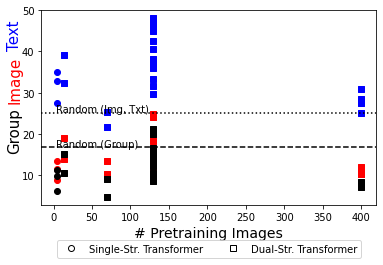

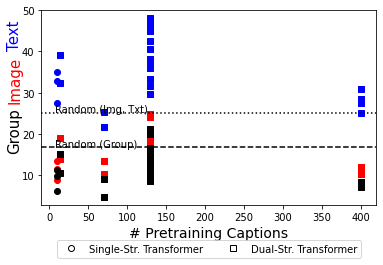

In [ ]:
print("Plotting model performance figures...")
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
single_stream_indices = [item[0] for item in enumerate(models_without_data_size_outliers) if item[1][4] == "single-stream"]
dual_stream_indices = [item[0] for item in enumerate(models_without_data_size_outliers) if item[1][4] == "dual-stream"]


for score_type, color in [("Text", "blue"), ("Image", "red"), ("Group", "black")]:
    single_img = ax1.scatter([pretrain_img[i] for i in single_stream_indices], [table_dict_no_outliers[score_type][i] for i in single_stream_indices], c=color, marker="o")
    dual_img = ax1.scatter([pretrain_img[i] for i in dual_stream_indices], [table_dict_no_outliers[score_type][i] for i in dual_stream_indices], c=color, marker="s")

    single_cap = ax2.scatter([pretrain_cap[i] for i in single_stream_indices], [table_dict_no_outliers[score_type][i] for i in single_stream_indices], c=color, marker="o")
    dual_cap = ax2.scatter([pretrain_cap[i] for i in dual_stream_indices], [table_dict_no_outliers[score_type][i] for i in dual_stream_indices], c=color, marker="s")

ybox_ax2_1 = TextArea("Text", textprops=dict(color="b", size=15,rotation=90,ha='left',va='bottom'))
ybox_ax2_2 = TextArea("Image", textprops=dict(color="r", size=15,rotation=90,ha='left',va='bottom'))
ybox_ax2_3 = TextArea("Group", textprops=dict(color="k", size=15,rotation=90,ha='left',va='bottom'))
ybox_ax1 = VPacker(children=[ybox_ax2_1, ybox_ax2_2, ybox_ax2_3],align="bottom", pad=0, sep=5)
anchored_ybox1 = AnchoredOffsetbox(loc=8, child=ybox_ax1, pad=0., frameon=False, bbox_to_anchor=(-0.08, 0.25),
                                   bbox_transform=ax1.transAxes, borderpad=0.)
ax1.add_artist(anchored_ybox1)
ax1.set_xlabel("# Pretraining Images", fontsize=14)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Single-Str. Transformer', markerfacecolor='none', markeredgecolor='black'),
                   Line2D([0], [0], marker='s', color='w', label='Dual-Str. Transformer', markerfacecolor='none', markeredgecolor='black')]
ax1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, prop={'size': 10})

ybox_ax2_1 = TextArea("Text", textprops=dict(color="b", size=15,rotation=90,ha='left',va='bottom'))
ybox_ax2_2 = TextArea("Image", textprops=dict(color="r", size=15,rotation=90,ha='left',va='bottom'))
ybox_ax2_3 = TextArea("Group", textprops=dict(color="k", size=15,rotation=90,ha='left',va='bottom'))
ybox_ax2 = VPacker(children=[ybox_ax2_1, ybox_ax2_2, ybox_ax2_3],align="bottom", pad=0, sep=5)
anchored_ybox2 = AnchoredOffsetbox(loc=8, child=ybox_ax2, pad=0., frameon=False, bbox_to_anchor=(-0.08, 0.25),
                                  bbox_transform=ax2.transAxes, borderpad=0.)
ax2.add_artist(anchored_ybox2)
ax2.set_xlabel("# Pretraining Captions", fontsize=14)
ax2.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, prop={'size': 10})

ax1.axhline(25, linestyle=':', c="black")
ax1.axhline(16.67, linestyle='--', c="black")
ax1.text(3.2, 25.2, 'Random (Img, Txt)')
ax1.text(3.34, 16.87, 'Random (Group)')
fig1.subplots_adjust(bottom=0.2)

ax2.axhline(25, linestyle=':', c="black")
ax2.axhline(16.67, linestyle='--', c="black")
ax2.text(7.5, 25.2, 'Random (Img, Txt)')
ax2.text(7.82, 16.87, 'Random (Group)')
fig2.subplots_adjust(bottom=0.2)

plt.show()